### How to follow this tutorial

* Go to http://162.13.127.11:8000/
* This will serve up a temporary notebook server that you can use
* Warning: your notebook server will die after 20 minutes of activity
* We're going to be processing some CSV and XML data relating to UK businesses

### What I'm going to focus on

### What I'm not going to focus on
* Timeseries
* Panels (> 2 dimensions DataFrames)
* Hierarchical indexing 
* Transformations - ```melt()``` and ```pivot()```

### Imports and magics

First of all, we'll import the libraries we expect to need and call the magic functions we expect to use.

In [402]:
%matplotlib inline

In [472]:
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET

### Load reference data

Pandas has a rich Import/Output API that works with common formats like CSV, Excel, SQL, pickled files (and even the clipboard) as well as more specialist formats like HDF5.

These (input) exist as top level functions ```pd.read_csv()``` and (output) on objects like ```DataFrames``` ```df.to_csv()```.

Lets try and use ```read_csv``` to load in a sample of the list of all the registered businesses in the UK. There is a sample dataset in ```datasets/companies/companies-house.csv```.

In [160]:
df = pd.read_csv('datasets/companies/companies-house.csv')

### DataFrame basics

Now that we've got out dataframe, what sort of things can we do with it?

In [161]:
# Have a look at the columns we've got
df.columns

Index([u'CompanyName', u' CompanyNumber', u'RegAddress.CareOf',
       u'RegAddress.POBox', u'RegAddress.AddressLine1',
       u' RegAddress.AddressLine2', u'RegAddress.PostTown',
       u'RegAddress.County', u'RegAddress.Country', u'RegAddress.PostCode',
       u'CompanyCategory', u'CompanyStatus', u'CountryOfOrigin',
       u'DissolutionDate', u'IncorporationDate', u'Accounts.AccountRefDay',
       u'Accounts.AccountRefMonth', u'Accounts.NextDueDate',
       u'Accounts.LastMadeUpDate', u'Accounts.AccountCategory',
       u'Returns.NextDueDate', u'Returns.LastMadeUpDate',
       u'Mortgages.NumMortCharges', u'Mortgages.NumMortOutstanding',
       u'Mortgages.NumMortPartSatisfied', u'Mortgages.NumMortSatisfied',
       u'SICCode.SicText_1', u'SICCode.SicText_2', u'SICCode.SicText_3',
       u'SICCode.SicText_4', u'LimitedPartnerships.NumGenPartners',
       u'LimitedPartnerships.NumLimPartners', u'URI',
       u'PreviousName_1.CONDATE', u' PreviousName_1.CompanyName',
       u' Previou

In [55]:
# and their datatypes
df.dtypes

Unnamed: 0                              int64
CompanyName                            object
 CompanyNumber                         object
RegAddress.CareOf                      object
RegAddress.POBox                       object
RegAddress.AddressLine1                object
 RegAddress.AddressLine2               object
RegAddress.PostTown                    object
RegAddress.County                      object
RegAddress.Country                     object
RegAddress.PostCode                    object
CompanyCategory                        object
CompanyStatus                          object
CountryOfOrigin                        object
DissolutionDate                       float64
IncorporationDate                      object
Accounts.AccountRefDay                float64
Accounts.AccountRefMonth              float64
Accounts.NextDueDate                   object
Accounts.LastMadeUpDate                object
Accounts.AccountCategory               object
Returns.NextDueDate               

In [56]:
# Inspect the first few or last rows
df.head()

,Unnamed: 0,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,clean_name,has_trademark
0,50,J.C.B. EQUIPMENT LIMITED,01000710,NaN,NaN,LAKESIDE WORKS,ROCESTER,STAFFS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j.c.b. equipment limited,0
1,175,J.C.W (NW) LIMITED,09028601,NaN,NaN,144 THATTO HEATH ROAD,NaN,ST. HELENS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j.c.w (nw) limited,0
2,225,J.D BARTON LTD,09035149,NaN,NaN,38 HUNTER CLOSE,WILLESBOROUGH,ASHFORD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j.d barton ltd,0
3,252,J.D. AUTOMOTIVE (LUDLOW) LTD,04806642,NaN,NaN,SMITHFIELD CAR PARK,LOWER GALDEFORD,LUDLOW,SHROPSHIRE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j.d. automotive (ludlow) ltd,0
4,346,J.D. PHILLIPS & DAUGHTERS LIMITED,04947680,NaN,NaN,LLANDISILIO STORES & POST OFFICE,LLANDISILIO,CLYNDERWEN,PEMBS.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j.d. phillips & daughters limited,0


In [57]:
df.tail(10)

,Unnamed: 0,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,clean_name,has_trademark
11043,849165,PIPEWORKS MECHANICAL SERVICES (SOUTH EAST) LIM...,06506556,NaN,NaN,3 THE OLD PRINT HOUSE,RUSSELL STREET,DOVER,KENT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pipeworks mechanical services (south east) lim...,0
11044,849265,PIPLAIN DESIGN UK LIMITED,08742811,NaN,NaN,"HALE HOUSE, UNIT 5",296A GREEN LANES,PALMERS GREEN,LONDON,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,piplain design uk limited,0
11045,849316,PIPPA ROLLS DESIGNS LIMITED,07755892,NaN,NaN,270 COLCHESTER ROAD,NaN,IPSWICH,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pippa rolls designs limited,0
11046,849352,PIPPIN BUILDING PRODUCTS LIMITED,04573772,NaN,NaN,8 NEW FIELDS,2 STINSFORD ROAD NUFFIELD,POOLE,DORSET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pippin building products limited,0
11047,849689,PIRBUDAK LIMITED,08824795,NaN,NaN,834 HERTFORD ROAD,NaN,ENFIELD,MIDDLESEX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pirbudak limited,0
11048,849732,PIRI FINO FRANCHISE LIMITED,08273169,NaN,NaN,573 CHESTER ROAD,NaN,SUTTON COLDFIELD,W MIDLANDS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,piri fino franchise limited,0
11049,849793,PIRNIE FARMS,SL000893,NaN,NaN,PIRNIE,KELSO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pirnie farms,0
11050,849827,PIRRIE DESIGN CAPITAL LTD.,08742539,NaN,NaN,209 CRANMER COURT,WHITEHEADS GROVE,LONDON,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pirrie design capital ltd.,0
11051,849880,PIS CONTRACTING LTD,09642072,NaN,NaN,BRANSTON COURT,BRANSTON STREET,BIRMINGHAM,NaN,UNITED KINGDOM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pis contracting ltd,0
11052,849984,PISGAH PARTNERS LIMITED,08631383,NaN,NaN,4 FITZGERALD AVENUE,NaN,LONDON,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pisgah partners limited,0


In [59]:
# Get out hands on the raw data
df.values

array([[50, 'J.C.B. EQUIPMENT LIMITED', '01000710', ..., nan,
        'j.c.b. equipment limited', 0],
       [175, 'J.C.W (NW) LIMITED', '09028601', ..., nan,
        'j.c.w (nw) limited', 0],
       [225, 'J.D BARTON LTD', '09035149', ..., nan, 'j.d barton ltd', 0],
       ..., 
       [849827, 'PIRRIE DESIGN CAPITAL LTD.', '08742539', ..., nan,
        'pirrie design capital ltd.', 0],
       [849880, 'PIS CONTRACTING LTD', '09642072', ..., nan,
        'pis contracting ltd', 0],
       [849984, 'PISGAH PARTNERS LIMITED', '08631383', ..., nan,
        'pisgah partners limited', 0]], dtype=object)

In [60]:
type(df.values)

numpy.ndarray

In [62]:
# Query to see how big our how big our data frame is
df.shape

(11053, 56)

In [63]:
# Quickly assess numerical data
df['Mortgages.NumMortCharges'].describe()

count    11053.000000
mean         0.779155
std          6.609417
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        312.000000
Name: Mortgages.NumMortCharges, dtype: float64

In [68]:
df['Mortgages.NumMortCharges'].sum()

8612

In [69]:
# And non-numerical data
df['SICCode.SicText_1'].describe()

count             11053
unique              556
top       None Supplied
freq               2477
Name: SICCode.SicText_1, dtype: object

In [70]:
# We can also call this on a frame as a whole and specify which types to include
df.describe(include=['object'])

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_2.CompanyName,PreviousName_3.CONDATE,PreviousName_3.CompanyName,PreviousName_4.CONDATE,PreviousName_4.CompanyName,PreviousName_5.CONDATE,PreviousName_5.CompanyName,PreviousName_6.CONDATE,PreviousName_6.CompanyName,clean_name
count,11053,11053,469,14,11022,7539,10738,5709,2565,10945,...,237,53,53,15,15,3,3,2,2,11053
unique,11053,11053,427,14,9489,5451,1766,368,25,9182,...,237,52,53,15,15,3,3,2,2,11053
top,LONDON HOLIDAY SERVICES LIMITED,00764426,NEW WAVE ACCOUNTING,46,145-157 ST JOHN STREET,LONDON,LONDON,SURREY,ENGLAND,EC1V 4PW,...,PRECIS (2464) LIMITED,30/01/1998,BITS AND PIXELS LTD,16/08/1996,"DONALD HEALEY MOTOR COMPANY,LIMITED",09/11/2010,EVER 1199 LIMITED,24/02/1999,SOUTH WALES RADIO LIMITED,olsense limited
freq,1,1,7,1,46,131,1937,326,1274,52,...,1,2,1,1,1,1,1,1,1,1


In [73]:
# Each Company Number is unique..
df[' CompanyNumber'].nunique()

11053

### Data types

The main pandas datatypes are ```float```, ```int```, ```bool```, ```datetime64```, ```timedelta``` and ```object```. ```float``` and ```int``` also have 32 and 64 bit variants.

Lets take a look at the datatypes in our dataframe again.

In [75]:
df.dtypes

Unnamed: 0                              int64
CompanyName                            object
 CompanyNumber                         object
RegAddress.CareOf                      object
RegAddress.POBox                       object
RegAddress.AddressLine1                object
 RegAddress.AddressLine2               object
RegAddress.PostTown                    object
RegAddress.County                      object
RegAddress.Country                     object
RegAddress.PostCode                    object
CompanyCategory                        object
CompanyStatus                          object
CountryOfOrigin                        object
DissolutionDate                       float64
IncorporationDate                      object
Accounts.AccountRefDay                float64
Accounts.AccountRefMonth              float64
Accounts.NextDueDate                   object
Accounts.LastMadeUpDate                object
Accounts.AccountCategory               object
Returns.NextDueDate               

In [76]:
df['IncorporationDate'] = pd.to_datetime(df['IncorporationDate'])

In [199]:
df.dtypes

CompanyName                            object
 CompanyNumber                         object
RegAddress.CareOf                      object
RegAddress.POBox                       object
RegAddress.AddressLine1                object
 RegAddress.AddressLine2               object
RegAddress.PostTown                    object
RegAddress.County                      object
RegAddress.Country                     object
RegAddress.PostCode                    object
CompanyCategory                        object
CompanyStatus                          object
CountryOfOrigin                        object
DissolutionDate                       float64
IncorporationDate                      object
Accounts.AccountRefDay                float64
Accounts.AccountRefMonth              float64
Accounts.NextDueDate                   object
Accounts.LastMadeUpDate                object
Accounts.AccountCategory               object
Returns.NextDueDate                    object
Returns.LastMadeUpDate            

In [79]:
df['IncorporationDate'].describe()

count                   11053
unique                   4467
top       2015-01-19 00:00:00
freq                       18
first     1864-01-04 00:00:00
last      2015-12-06 00:00:00
Name: IncorporationDate, dtype: object

### Selecting rows and columns

How can we slice and dice with pandas?

```[]``` generally returns a lower dimensional datastructure

In [80]:
type(df['CompanyName'])

pandas.core.series.Series

In [82]:
names = df['CompanyName']
type(names[0])

str

In [84]:
# We can also pass a list of columns
type(df[['CompanyName', 'IncorporationDate']])

pandas.core.frame.DataFrame

In [85]:
df[['CompanyName', 'IncorporationDate']].head(2)

,CompanyName,IncorporationDate
0,J.C.B. EQUIPMENT LIMITED,1971-01-25
1,J.C.W (NW) LIMITED,2014-07-05


We can also access columns in DataFrames as an attribute, though this comes with a few caveats.

In [86]:
df.CompanyName.head()

0             J.C.B. EQUIPMENT LIMITED
1                   J.C.W (NW) LIMITED
2                       J.D BARTON LTD
3         J.D. AUTOMOTIVE (LUDLOW) LTD
4    J.D. PHILLIPS & DAUGHTERS LIMITED
Name: CompanyName, dtype: object

In [88]:
df.Mortgages.NumMortCharges

AttributeError: 'DataFrame' object has no attribute 'Mortgages'

Try using tab-complete...

A simple way of slicing rows is to use ```[]```. This works in much the same way as standard Python slicing.

How would you access the first row in a DataFrame?

In [91]:
df[:1]

,Unnamed: 0,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,clean_name,has_trademark
0,50,J.C.B. EQUIPMENT LIMITED,01000710,NaN,NaN,LAKESIDE WORKS,ROCESTER,STAFFS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j.c.b. equipment limited,0


How would you access all but the last row in a DataFrame?

In [100]:
df.tail(3)

,Unnamed: 0,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,clean_name,has_trademark
11050,849827,PIRRIE DESIGN CAPITAL LTD.,08742539,NaN,NaN,209 CRANMER COURT,WHITEHEADS GROVE,LONDON,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pirrie design capital ltd.,0
11051,849880,PIS CONTRACTING LTD,09642072,NaN,NaN,BRANSTON COURT,BRANSTON STREET,BIRMINGHAM,NaN,UNITED KINGDOM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pis contracting ltd,0
11052,849984,PISGAH PARTNERS LIMITED,08631383,NaN,NaN,4 FITZGERALD AVENUE,NaN,LONDON,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pisgah partners limited,0


In [124]:
print df.shape[0]
print df[:df.shape[0]-1].shape[0]
df[:df.shape[0]-1].tail(2)

11053
11052


,Unnamed: 0,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,clean_name,has_trademark
11050,849827,PIRRIE DESIGN CAPITAL LTD.,08742539,NaN,NaN,209 CRANMER COURT,WHITEHEADS GROVE,LONDON,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pirrie design capital ltd.,0
11051,849880,PIS CONTRACTING LTD,09642072,NaN,NaN,BRANSTON COURT,BRANSTON STREET,BIRMINGHAM,NaN,UNITED KINGDOM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pis contracting ltd,0


We can also introduce a step parameter

In [114]:
df[:20:10]

,Unnamed: 0,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,clean_name,has_trademark
0,50,J.C.B. EQUIPMENT LIMITED,01000710,NaN,NaN,LAKESIDE WORKS,ROCESTER,STAFFS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j.c.b. equipment limited,0
10,722,J.E.K. ASSOCIATES LIMITED,06897464,NaN,NaN,6 TIPPENDELL LANE,CHISWELL GREEN,ST ALBANS,HERTFORDSHIRE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j.e.k. associates limited,0


How would we take every third company name of the first 10 companies?

ie 3rd, 6th and 9th

In [121]:
df[:10].CompanyName

0                      J.C.B. EQUIPMENT LIMITED
1                            J.C.W (NW) LIMITED
2                                J.D BARTON LTD
3                  J.D. AUTOMOTIVE (LUDLOW) LTD
4             J.D. PHILLIPS & DAUGHTERS LIMITED
5                            J.D. WYATT LIMITED
6              J.D.H. BUSINESS SERVICES LIMITED
7                           J.E. PORTER LIMITED
8    J.E. STRUTT FARMING (PLANT & HIRE) LIMITED
9                      J.E.BALLARD & CO.LIMITED
Name: CompanyName, dtype: object

In [122]:
df[2:10:3].CompanyName

2                                J.D BARTON LTD
5                            J.D. WYATT LIMITED
8    J.E. STRUTT FARMING (PLANT & HIRE) LIMITED
Name: CompanyName, dtype: object

pandas allows selection by label, position, index and advanced hierarchical indexing.

The devil is in the detail, and its easy to get into a mess.

```df.loc``` is used for selection via the index and can take a label, a list of labels, a slice of lables and a boolean array. The rules governing things like which elements are inclusive/exclusive vary from what you might expect.

In [133]:
# Take the row with the index label 0 - this is NOT generally the 0th element
df.loc[0].CompanyName

'J.C.B. EQUIPMENT LIMITED'

```.loc``` can also take a list of index labels. How would we take every other element, upto the 10th, starting at the 2nd?

In [134]:
df.loc[range(1,10,2)].CompanyName

1              J.C.W (NW) LIMITED
3    J.D. AUTOMOTIVE (LUDLOW) LTD
5              J.D. WYATT LIMITED
7             J.E. PORTER LIMITED
9        J.E.BALLARD & CO.LIMITED
Name: CompanyName, dtype: object

```.loc``` can also take a slice object. Both the stop and the start are included. How would we take the first 6 company names?

In [136]:
df.loc[0:5].CompanyName

0             J.C.B. EQUIPMENT LIMITED
1                   J.C.W (NW) LIMITED
2                       J.D BARTON LTD
3         J.D. AUTOMOTIVE (LUDLOW) LTD
4    J.D. PHILLIPS & DAUGHTERS LIMITED
5                   J.D. WYATT LIMITED
Name: CompanyName, dtype: object

In [138]:
# Compare this to
df[0:5].CompanyName

0             J.C.B. EQUIPMENT LIMITED
1                   J.C.W (NW) LIMITED
2                       J.D BARTON LTD
3         J.D. AUTOMOTIVE (LUDLOW) LTD
4    J.D. PHILLIPS & DAUGHTERS LIMITED
Name: CompanyName, dtype: object

We can also pass in boolean arrays.

In [141]:
df.loc[[True, False, True]].CompanyName

0    J.C.B. EQUIPMENT LIMITED
2              J.D BARTON LTD
Name: CompanyName, dtype: object

We'll look at Boolean arrays in more detail later when we talk about Masks. For now, its worth pointing out that you can also pass in column labels to ```.loc```.

In [143]:
df.loc[0:5, ['CompanyName', 'IncorporationDate']]

,CompanyName,IncorporationDate
0,J.C.B. EQUIPMENT LIMITED,1971-01-25
1,J.C.W (NW) LIMITED,2014-07-05
2,J.D BARTON LTD,2014-12-05
3,J.D. AUTOMOTIVE (LUDLOW) LTD,2003-06-20
4,J.D. PHILLIPS & DAUGHTERS LIMITED,2003-10-30
5,J.D. WYATT LIMITED,2003-04-29


```.iloc``` allows selection by position. Most of this is pretty intuitive.

In [162]:
df.iloc[0, 0]

'J.C.B. EQUIPMENT LIMITED'

In [164]:
df.iloc[:5, [0,1]]

,CompanyName,CompanyNumber
0,J.C.B. EQUIPMENT LIMITED,01000710
1,J.C.W (NW) LIMITED,09028601
2,J.D BARTON LTD,09035149
3,J.D. AUTOMOTIVE (LUDLOW) LTD,04806642
4,J.D. PHILLIPS & DAUGHTERS LIMITED,04947680


In [167]:
df.iloc[:, 0:5].head()

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1
0,J.C.B. EQUIPMENT LIMITED,01000710,NaN,NaN,LAKESIDE WORKS
1,J.C.W (NW) LIMITED,09028601,NaN,NaN,144 THATTO HEATH ROAD
2,J.D BARTON LTD,09035149,NaN,NaN,38 HUNTER CLOSE
3,J.D. AUTOMOTIVE (LUDLOW) LTD,04806642,NaN,NaN,SMITHFIELD CAR PARK
4,J.D. PHILLIPS & DAUGHTERS LIMITED,04947680,NaN,NaN,LLANDISILIO STORES & POST OFFICE


In [169]:
# Pandas is fairly forgiving in terms of accessing out or ranges slices.
df.shape[0]

11053

In [171]:
df['CompanyName'].tail(5)

11048    PIRI FINO FRANCHISE LIMITED
11049                   PIRNIE FARMS
11050     PIRRIE DESIGN CAPITAL LTD.
11051            PIS CONTRACTING LTD
11052        PISGAH PARTNERS LIMITED
Name: CompanyName, dtype: object

In [170]:
df.iloc[df.shape[0]-4:df.shape[0]+4:, 0]

11049                  PIRNIE FARMS
11050    PIRRIE DESIGN CAPITAL LTD.
11051           PIS CONTRACTING LTD
11052       PISGAH PARTNERS LIMITED
Name: CompanyName, dtype: object

Finally ```.ix``` is more general and allows inputs that both ```.iloc``` and ```.loc``` would expect. It comes into its own when dealing with hierarchical indees that are of mixed types (ie positional and pure label based).

I tend to stick to ```.loc``` and avoid hierarchical indexes.

One other function that is worth mentioning is ```.sample()```.

In [172]:
df['CompanyName'].sample(n=10, replace=False, weights=np.random.rand(df.shape[0]))

10648                          PERSPECTIVE TRADING LIMITED
1889     KINGSTON BUSINESS DEVELOPMENT SERVICES (U.K.) ...
4138                            LV POWER SOLUTIONS LIMITED
963                           JS INVESTMENT MANAGEMENT LTD
3835                            LONDON WINGS CORPORATE LTD
10158                              PATCH SOLUTIONS LIMITED
1482                        KEBLE COURT (STAMFORD) LIMITED
824                            JOINT VENTURE CONTRACTS LTD
9843                    PALLADIUM CLOTHING COMPANY LIMITED
9500                           OVERLOAD MANAGEMENT LIMITED
Name: CompanyName, dtype: object

How would we generate a sample, favouring those that have mortgages?

In [173]:
df[['CompanyName', 'Mortgages.NumMortCharges']].sample(n=10, 
                                                       weights=df['Mortgages.NumMortCharges'])

,CompanyName,Mortgages.NumMortCharges
7188,MULTIGRAPHICS LIMITED,15
5173,MARTON COUNTRY CLUB LIMITED,7
6890,MORTLAKE UNDERWRITING LIMITED,128
7531,NAMECO (NO.804) LIMITED,70
4952,MAREHAY GARAGE LIMITED,2
2199,KRNS PROPERTIES LTD,10
5947,METNOR PROPERTY GROUP LIMITED,10
810,JOHNSTON BERRY LTD,33
1439,KBC PUBLIC RELATIONS & MARKETING LTD.,4
4016,LS CLAYTON SQUARE LIMITED,11


pandas also allows for boolean masking.

In [189]:
df[df['Mortgages.NumMortCharges'] == 10][['CompanyName', 'Mortgages.NumMortCharges']].head()

,CompanyName,Mortgages.NumMortCharges
7,J.E. PORTER LIMITED,10
484,JEVENOR LIMITED,10
2199,KRNS PROPERTIES LTD,10
2569,LANDER AUTOMOTIVE LTD.,10
3348,LINETEX INVESTMENTS LIMITED,10


Find the earlist incorporation date of a company incorporated this year.

In [191]:
df[df['IncorporationDate'] > '2015-01-01']['IncorporationDate'].min()

'2015-01-04'

Find the average number of mortgage charges for companies orginating outside the United Kingdom (use CountryOfOrigin and 'United Kingdom').

In [195]:
df[df.CountryOfOrigin != 'United Kingdom']['Mortgages.NumMortCharges'].mean()

0.080000000000000002

You can also use ```.isin()``` to build a boolean mask over a list (or similar) and combine masks.

How would you find the set of companies that are either 'Private Limited Company' or 'Public Limited Company' and were incorporated in 2014?

In [204]:
types = ['Private Limited Company', 'Public Limited Company']
cols = ['CompanyName', 'IncorporationDate', 'CompanyCategory']

df[(df.IncorporationDate > '2013-12-31') & 
   (df.IncorporationDate < '2015-01-01') & 
   (df.CompanyCategory.isin(types))][cols].sample(10)

,CompanyName,IncorporationDate,CompanyCategory
4775,MANCHURIA SECURITIES LIMITED,2014-11-12,Private Limited Company
10706,PETERANNA LTD,2014-09-16,Private Limited Company
2263,"KUNSHAN SUHONG MOULD & PLASTICS CO., LTD",2014-04-29,Private Limited Company
5273,MATT MURDOCK LIMITED,2014-08-28,Private Limited Company
8686,NUTRAVIT UK LIMITED,2014-05-20,Private Limited Company
2,J.D BARTON LTD,2014-12-05,Private Limited Company
7857,NEW BANKHEAD LIMITED,2014-07-16,Private Limited Company
7086,MS TRADING LTD,2014-11-04,Private Limited Company
371,JD TRANSPORT LTD,2014-07-14,Private Limited Company
6133,MIDASUK LTD,2014-07-24,Private Limited Company


We can also negate conditions using ```~```.

How would you find the set of countries that companies originate from other than the United Kingdom?

You can use ```unique()``` to return unique values from a column.

In [207]:
df[~df.CountryOfOrigin.isin(['United Kingdom'])].CountryOfOrigin.unique()

array(['IRELAND', 'CHANNEL ISLANDS', 'VIRGIN ISLANDS', 'FRANCE',
       'NETHERLANDS', 'GERMANY', 'ISLE OF MAN', 'WEST GERMANY', 'HUNGARY',
       'SPAIN', 'UNITED STATES', 'CAYMAN ISLANDS', 'NIGERIA', 'INDIA',
       'CANADA', 'SINGAPORE', 'DENMARK'], dtype=object)

As a quick aside, we can use these masks to inspect particular rows, such as those that we know might contain non-ASCII characters.

In [217]:
df[df[' CompanyNumber'] == '02334804']['CompanyName']

7783    NESTLÉ WATERS UK LIMITED
Name: CompanyName, dtype: object

### Working with strings

pandas has a set of methods for processing strings. These are accessible using the ```str``` attribute and should be familiar from standard Python.

In [209]:
df.CompanyName.str.len().describe()

count    11053.000000
mean        24.312766
std          8.380376
min          4.000000
25%         18.000000
50%         23.000000
75%         29.000000
max         76.000000
Name: CompanyName, dtype: float64

Lets look at our column names again:

In [208]:
df.columns

Index([u'CompanyName', u' CompanyNumber', u'RegAddress.CareOf',
       u'RegAddress.POBox', u'RegAddress.AddressLine1',
       u' RegAddress.AddressLine2', u'RegAddress.PostTown',
       u'RegAddress.County', u'RegAddress.Country', u'RegAddress.PostCode',
       u'CompanyCategory', u'CompanyStatus', u'CountryOfOrigin',
       u'DissolutionDate', u'IncorporationDate', u'Accounts.AccountRefDay',
       u'Accounts.AccountRefMonth', u'Accounts.NextDueDate',
       u'Accounts.LastMadeUpDate', u'Accounts.AccountCategory',
       u'Returns.NextDueDate', u'Returns.LastMadeUpDate',
       u'Mortgages.NumMortCharges', u'Mortgages.NumMortOutstanding',
       u'Mortgages.NumMortPartSatisfied', u'Mortgages.NumMortSatisfied',
       u'SICCode.SicText_1', u'SICCode.SicText_2', u'SICCode.SicText_3',
       u'SICCode.SicText_4', u'LimitedPartnerships.NumGenPartners',
       u'LimitedPartnerships.NumLimPartners', u'URI',
       u'PreviousName_1.CONDATE', u' PreviousName_1.CompanyName',
       u' Previou

How can we deal with that whitespace using the ```strip()``` method?

In [210]:
df.columns = df.columns.str.strip()

In [215]:
df.iloc[:2, :2]

,CompanyName,CompanyNumber
0,J.C.B. EQUIPMENT LIMITED,01000710
1,J.C.W (NW) LIMITED,09028601


### Creating DataFrames from other sources and merging DataFrames together

As we saw in the overview, pandas has many ways of creating DataFrames.

We're going to load in some recent trademark applications from UK companies. This data is in XML, so we're going to have to do a bit more preprocessing to get it into a DataFrame.

We're going to use the ```etree``` package of the ```lxml``` library we imported at the top of the tutorial to do this. 

In [473]:
# Parse and access the root member
! gunzip datasets/trademarks/jnl.xml
raw_trademarks = ET.parse('datasets/trademarks/jnl.xml')
doc = tree.getroot()

# Use an xpath expression to iterate over each applicant name, and build a list
applicants = [a.text for a in doc.findall('.//ApplicantName')]

In [474]:
# Create a DataFrame using a dict of lists
trademarks = pd.DataFrame({'applicants': applicants})

In [475]:
trademarks.head()

,applicants
0,Barefaced Skincare Limited
1,Floreana Ltd
2,Floreana Ltd
3,Step2Progress Limited
4,Peter John Savage


In [476]:
trademarks.count()

applicants    1001
dtype: int64

OK, so we've got two DataFrames now. One has our sample of companies, and one has our list of applicants.

pandas provides database style join methods for joining two dataframes.

Breif aside: checkout ```pd.concat([df1, df2])``` for (in its simplest form) concatanating two DataFrames together. 

There is scope for dealing with DataFrames of different widths (ie number of columns) and or indexing schemes. But, as with so much of pandas it rapidly becomse hard to track what is actually going on and code becomes unreadable. If your DataFrames do not match up nicely and you want to concatanate them, sort them out first.

Back to our merge methods.

These are performant ways of joining two DataFrames on indexes or specific columns. We'll focus on ```pd.merge```. This takes two data frames (a 'left' and a 'right') and returns a new dataframe which is the result of the merge.

The approach taken to the merge is controlled by the 'how' keyword argument. For the indexes or chosen columns:
* inner: retain the intersection of rows where the columns match
* left: retain all rows from the left DataFrame, retain only those from the right that match
* right: retain all rows from the right DataFrame, retain only those from the left that match
* outer: retain all rows from both DataFrames

What does this look like in practice?

In [477]:
pd.merge(trademarks,
         df[['CompanyName']], #Note df['CompanyName'] would return a Series
         how='inner',
         left_on='applicants',
         right_on='CompanyName')

,applicants,CompanyName
0,PEEL HOLDINGS LAND AND PROPERTY (UK) LIMITED,PEEL HOLDINGS LAND AND PROPERTY (UK) LIMITED
1,JE NETTOIE LIMITED,JE NETTOIE LIMITED
2,JOSHBRAND PROMOTIONS LIMITED,JOSHBRAND PROMOTIONS LIMITED
3,OLLYHUGS LTD,OLLYHUGS LTD
4,LINKING ENVIRONMENT AND FARMING,LINKING ENVIRONMENT AND FARMING
5,NATIONAL SKILLS ACADEMY FOR FOOD AND DRINK,NATIONAL SKILLS ACADEMY FOR FOOD AND DRINK
6,ONE BOUTIQUE LONDON LTD,ONE BOUTIQUE LONDON LTD
7,ORB GLOBAL LTD,ORB GLOBAL LTD
8,PEGAS TOURISTIK UK LIMITED,PEGAS TOURISTIK UK LIMITED
9,ONEE GROUP LIMITED,ONEE GROUP LIMITED


Thats not a very good match rate!

What can we do to improve this?

One option is to perform some normalisation on the applicant and company names using the ```str``` methods we saw earlier.

What could we do here?

* lowercase
* strip leading/trailing spaces
* strip whitespace
* deal with Limited and Ltd

In [239]:
trademarks.applicants.str.lower().str.strip().str.replace(' ', '').head(20)

0      barefacedskincarelimited
1                   floreanaltd
2                   floreanaltd
3          step2progresslimited
4               peterjohnsavage
5               vincentdassault
6                     ianredman
7         turbomedorthoticsinc.
8       portusconsultinglimited
9              marekryanlarwood
10                 brokdlimited
11    inspireddentalcarelimited
12                 gymreaperltd
13               agentagroupltd
14       philbinproductslimited
15     buoyantupholsterylimited
16               centerpiecellp
17               péan&zakianllp
18                paulkaraiskos
19                    aranosman
Name: applicants, dtype: object

Lets take a look at the ```applymap()``` function. This applies a function to each element of a DataFrame.

In [521]:
def normalise(name):
    """Normalise a company name for matching"""
            
    name = name.lower()
    name = name.strip()
    
    bad_chars = [' ', '.']
    
    for bc in bad_chars:
        name.replace(bc, '')
    
    return name

In [522]:
df[['CompanyName']].applymap(normalise).head()

,CompanyName
0,j.c.b. equipment limited
1,j.c.w (nw) limited
2,j.d barton ltd
3,j.d. automotive (ludlow) ltd
4,j.d. phillips & daughters limited


In [523]:
trademarks[['applicants']].applymap(normalise).head()

,applicants
0,barefaced skincare limited
1,floreana ltd
2,floreana ltd
3,step2progress limited
4,peter john savage


In [524]:
df['norm_CompanyName'] = df[['CompanyName']].applymap(normalise)
trademarks['norm_Applicant'] = trademarks[['applicants']].applymap(normalise)

In [515]:
# Lets go ahead and do an inner merge to work see what thats done to our match rate
pd.merge(trademarks,
         df[['norm_CompanyName']],
         how='inner',
         left_on='norm_Applicant',
         right_on='norm_CompanyName').shape[0]

74

Thats a better match rate.

How would we create a new DataFrame (lets call it ```matched_trademarks``` which has all of our trademark applications in, along with the registered postcode ```RegAddress.PostCode``` of companies we've matched from ```df```?

In [516]:
matched_trademarks = pd.merge(trademarks,
         df[['norm_CompanyName', 'RegAddress.PostCode']],
         how='left',
         left_on='norm_Applicant',
         right_on='norm_CompanyName')

In [517]:
matched_trademarks.head(5)

,applicants,norm_Applicant,norm_CompanyName,RegAddress.PostCode
0,Barefaced Skincare Limited,barefacedskincarelimited,NaN,NaN
1,Floreana Ltd,floreanaltd,NaN,NaN
2,Floreana Ltd,floreanaltd,NaN,NaN
3,Step2Progress Limited,step2progresslimited,NaN,NaN
4,Peter John Savage,peterjohnsavage,NaN,NaN


We might want to get rid of the some of the columns after we've done the match. We can do this using the ```drop()``` method - this takes the ```column``` or ```row``` labels, the ```axis``` and whether or not we should work in place using ```inplace```, which takes a ```boolean```.

How would we use this function to drop our normalised name columns from our trademarks DataFrame?

In [518]:
matched_trademarks.drop(['norm_Applicant', 'norm_CompanyName'], axis=1).head(5)

,applicants,RegAddress.PostCode
0,Barefaced Skincare Limited,NaN
1,Floreana Ltd,NaN
2,Floreana Ltd,NaN
3,Step2Progress Limited,NaN
4,Peter John Savage,NaN


In [519]:
matched_trademarks.drop(['norm_Applicant', 'norm_CompanyName'],
                        axis=1,
                       inplace=True)

In [520]:
matched_trademarks.head(5)

,applicants,RegAddress.PostCode
0,Barefaced Skincare Limited,NaN
1,Floreana Ltd,NaN
2,Floreana Ltd,NaN
3,Step2Progress Limited,NaN
4,Peter John Savage,NaN


### Working with missing data

pandas is pretty flexible when it comes to considering missing data, though as ever there are gotchas to keep in mind: ```NaN``` and ```None``` are considered missing by default, but ```inf``` and ```-inf``` are not. The ```Series``` functions ```isnull()``` and ```notnull()``` are extremely useful for dealing with missing data, however defined.

They return a Boolean mask on whether the data was missing or not. 

How would we use ```notnull()``` to return applicant names that we matched to companies in our reference dataset?

In [340]:
matched_trademarks[matched_trademarks['RegAddress.PostCode'].notnull()].head(5)

,applicants,RegAddress.PostCode
14,Philbin Products Limited,CH64 5SZ
38,Outsmart the Thief Limited,YO43 3FN
40,NB Labs Limited,CR0 1DN
133,Mortgage Gym Limited,GU14 9DP
140,Jamaican Patties Limited,NW10 9ST


How would we use ```isnull()``` to count the total number of applications that we failed ot match?

In [341]:
matched_trademarks['RegAddress.PostCode'].isnull().sum()

927

We can use the function ```fillna()``` to fill in missing data. In the simplest case, we just pass in a scalar on the on the ```Series``` or ```DataFrame``` that we want to manipulate.

Lets use ```fillna()``` to replace missing postcodes with the keyworkd 'missing'. Remember the ```inplace``` argument from our ```drop()``` function? We need to consider that here also.

In [343]:
matched_trademarks['RegAddress.PostCode'].fillna('missing', inplace=True)

print matched_trademarks['RegAddress.PostCode'].isnull().sum()

0


In [346]:
(matched_trademarks['RegAddress.PostCode'] == 'missing').sum()

927

Its always worth checking how library functions deal with missing data and what the consider missing. 

### Grouping and aggregating data

pandas has some powerful functionality for grouping elements together and then computing some aggregate statistics, dropping groups or transforming them.

The ```groupby()``` method takes a key (often one or more column names) and returns a ```GroupBy``` object, which is a (lazily evaluated) grouping of (often rows) by the grouping criteria.

How would we use this function to group by the 'CompanyCategory'?

In [359]:
df.groupby('CompanyCategory')

Once we have our ```GroupBy``` object, there are a suite of functions that we can apply. An obvious one is ```size()```, which tells us the size of each of the groups we've built.

In [377]:
df.groupby('CompanyCategory').size()

CompanyCategory
Community Interest Company                                                                      23
Industrial and Provident Society                                                                27
Investment Company with Variable Capital                                                         1
Limited Liability Partnership                                                                  174
Limited Partnership                                                                             93
Other company type                                                                              28
PRI/LBG/NSC (Private, Limited by guarantee, no share capital, use of 'Limited' exemption)       87
PRI/LTD BY GUAR/NSC (Private, limited by guarantee, no share capital)                          210
Private Limited Company                                                                      10377
Private Unlimited Company                                                                    

This is just the start - there are lots of powerful things we can do with the ```GroupBy``` object. We're going to take a quick look at the ```agg``` function.

The ```agg``` function takes a function that reduces the dimensionality of the returned objects, eg ```mean```, ```std```, ```min```. Its possible to pass in a ```dict```, where keys are column names and the values are the aggregating function to be applied.

For example, to find the average number of 'Mortgages.NumMortOutstanding' we could pass in: ```{'Mortgages.NumMortOutstanding': np.mean}```.

How would we use ```agg``` to find the total number of 'Mortgages.NumMortCharges' in each 'CompanyCategory' group?

In [365]:
df.groupby('CompanyCategory').agg({'Mortgages.NumMortCharges': np.mean})

,Mortgages.NumMortCharges
CompanyCategory,
Community Interest Company,0.391304
Industrial and Provident Society,0.000000
Investment Company with Variable Capital,0.000000
Limited Liability Partnership,2.109195
Limited Partnership,0.000000
Other company type,0.071429
"PRI/LBG/NSC (Private, Limited by guarantee, no share capital, use of 'Limited' exemption)",0.126437
"PRI/LTD BY GUAR/NSC (Private, limited by guarantee, no share capital)",0.319048
Private Limited Company,0.780283


How would we find the maximum number of 'Mortgages.NumMortOutstanding' and the average number of 'Mortgages.NumMortSatisfied', grouping companies by 'CompanyCategory' and 'CompanyStatus'?

In [374]:
fns = {
    'Mortgages.NumMortOutstanding': np.max,
    'Mortgages.NumMortSatisfied': np.mean
}

df.groupby(['CompanyCategory', 'CompanyStatus']).agg(fns)

Mortgages.NumMortSatisfied  \
CompanyCategory                                    CompanyStatus                                                                  
Community Interest Company                         Active                                                              0.318182   
                                                   Active - Proposal to Strike off                                     0.000000   
Industrial and Provident Society                   Active                                                              0.000000   
Investment Company with Variable Capital           Active                                                              0.000000   
Limited Liability Partnership                      Active                                                              0.036585   
                                                   Active - Proposal to Strike off                                     0.000000   
                                                   In Administration                                                   0.000000   
                                                   Live but Receiver Manager on at least one charge                    0.000000   
Limited Partnership                                Active                                                              0.000000   
Other company type                                 Active                                                              0.035714   
PRI/LBG/NSC (Private, Limited by guarantee, no ... Active                                                              0.000000   
                                                   Active - Proposal to Strike off                                     0.000000   
PRI/LTD BY GUAR/NSC (Private, limited by guaran... Active                                                              0.087379   
                                                   Active - Proposal to Strike off                                     0.000000   
Private Limited Company                            ADMINISTRATIVE RECEIVER                                             0.000000   
                                                   Active                                                              0.275563   
                                                   Active - Proposal to Strike off                                     0.077803   
                                                   In Administration                                                   5.250000   
                                                   Liquidation                                                         0.741525   
                                                   Live but Receiver Manager on at least one charge                    0.750000   
                                                   Voluntary Arrangement                                               3.000000   
Private Unlimited Company                          Active                                                              0.700000   
                                                   Liquidation                                                         0.000000   
Public Limited Company                             Active                                                              0.687500   
                                                   Liquidation                                                         4.000000   
Registered Society                                 Active                                                              0.000000   
Royal Charter Company                              Active                                                              0.000000   

                                                                                                     Mortgages.NumMortOutstanding  
CompanyCategory                                    CompanyStatus                                                                   
Community Interest Company           

Grouping and aggregating in pandas is a vast topic. Just a few of the other things you could look at are:
* Iterating through groups: ```for name, group in df.groupby('CompanyCategory')```
* Selecting a group by label: ```df.groupby('CompanyCategory').get_group('Public Limited Company')```
* Dropping groups which don't mean certain criteria (ie size): ```filter(lambda x: len (x) > 50)```
* Using Grouper Specifications to control more precisely how to group (ie over sampling of certain groups)
* Taking the first ```head()``` or last ```tail()``` member of any group

Grouping is powerful, but can be expensive (particularly if fully evaluated). Sometimes (though not always) there are 'cheaper' ways of doing the same thing. It wouldn't be my 'goto' way of doing anything.

How would we find the incorporation date of oldest company in our sample in each postcode?

In [387]:
#Using groups
df.groupby(['RegAddress.PostCode']).agg({'IncorporationDate': np.min}).head()

,IncorporationDate
RegAddress.PostCode,
21 107,1999-11-11
AB10 1FW,1940-03-04
AB10 1HA,2001-08-16
AB10 1TN,1995-11-12
AB10 1UD,2006-11-29


Can you think of a different way of doing this using the ```sort()``` function?

In [392]:
df[['RegAddress.PostCode', 'IncorporationDate']].sort(['RegAddress.PostCode', 'IncorporationDate']).drop_duplicates(['RegAddress.PostCode']).head()

,RegAddress.PostCode,IncorporationDate
4808,21 107,1999-11-11
168,AB10 1FW,1940-03-04
6064,AB10 1HA,2001-08-16
5546,AB10 1TN,1995-11-12
8381,AB10 1UD,2006-11-29


In [396]:
%timeit -n 10 df.groupby(['RegAddress.PostCode']).agg({'IncorporationDate': np.min})

10 loops, best of 3: 777 ms per loop


In [401]:
%timeit -n 10 df[['RegAddress.PostCode', 'IncorporationDate']].sort(\
    ['RegAddress.PostCode', 'IncorporationDate']).drop_duplicates(\
    ['RegAddress.PostCode'])

10 loops, best of 3: 23.3 ms per loop


### Plotting

Plotting in pandas provides basic plotting capabilities by design, rather than trying to recreate all the functionality that is available elsewhere eg ```plot()``` is a wrapper around ```matplotlib.pyplot.plot()```.

In [427]:
import matplotlib
matplotlib.style.use('ggplot')

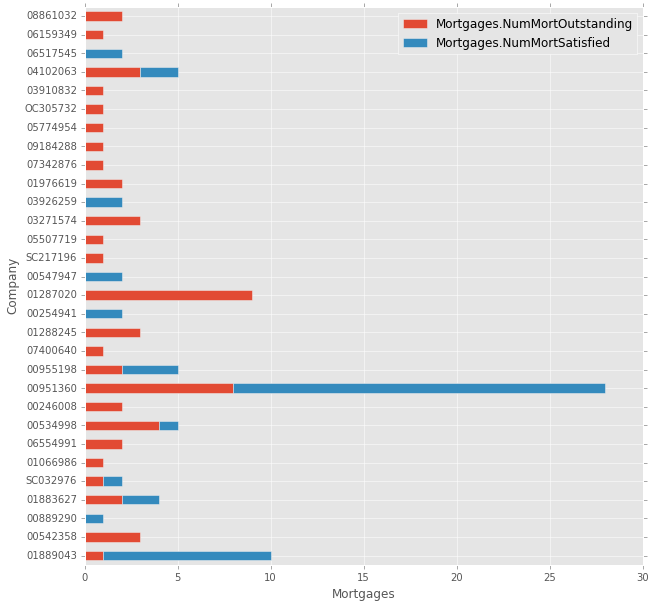

In [452]:
has_mortgage = df['Mortgages.NumMortCharges'] > 0

mortgages = [u'Mortgages.NumMortOutstanding',
             u'Mortgages.NumMortSatisfied']

ax = df[has_mortgage].head(30)[mortgages].plot(kind='barh', stacked=True, figsize=(10, 10))

ax.set_yticklabels(tuple(df[has_mortgage].CompanyNumber))
ax.set_ylabel("Company")
ax.set_xlabel("Mortgages")

Other common plotting operations are ```hist()```, ```df.plot(kind='scatter')``` and ```df.plot(kind='hexbin')```. Its also possible to mix them up.

<img src="scatter.png">

### A few gotchas

Use ```empty```, ```any()```, ```all()```, ```bool()``` and ```equals()``` to compare ```DataFrames``` and ```Series```.

In [455]:
df and trademarks

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [462]:
(df['Mortgages.NumMortCharges']>100).any()

True

In [464]:
df2 = df.copy(deep=True)
df.equals(df2)

True

Be aware of the ```SettingWithCopyWarning```. Remember that ```df[df.CompanyStatus == 'Active']``` returns a copy of a ```DataFrame```, so if you try to set a new value on the basis of this it will not work.

In [468]:
df[df['CompanyStatus'] == 'Active']['Solvent'] = True

/mnt/home_dirs/alex/.virtualenvs/ipython/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [469]:
'Solvent' in df.columns

False

Instead, in this case I would set the 'base case', and then use ```.loc``` to downselect to the rows I need to change.

In [470]:
df['Solvent'] = False
df.loc[df['CompanyStatus'] == 'Active', 'Solvent'] = True

In [471]:
df[df.Solvent].CompanyStatus.value_counts()

Active    10337
dtype: int64

### Things I haven't covered

* Timeseries
* Panels (> 2 dimensions DataFrames)
* Hierarchical indexing 
* Transformations (```melt()``` and ```pivot()```)
* ```categorical``` values (since ```0.15```), some similarity to ```factor``` in ```R```
* Other computational tools (```rolling_sum()```, ```rolling_std()```, ```rolling_apply()```)

### Key takeaways

* pandas is extremely powerful
* With great power etc - as with all code, readability beats writability
* pandas is not as internally consistent as it could be (works in place or returns)
* Whatever you want to do with your dataset there is probably a method in pandas for doing it - try to use inbuilt pandas functionality rather than eg iterating over rows/columns and doing something custom, it might just take a bit of digging and can feel 'head against wallish' for a bit
* Whatever you want to do with your dataset there are probably multiple ways of doing it in pandas - try to be (internally and externally) consistent and produce readable code
* Consider abstractions (eg Masks) to make code and notebooks more readable

### Resources

* GrowthIntel blog post on Mask algebra: 
http://growthintel.com/exploratory-data-analysis-in-pandas/
* pandas docs are comprehensive and getting better: http://pandas.pydata.org/
* Ecosystem of libraries is growing all the time: http://pandas.pydata.org/pandas-docs/version/0.16.2/ecosystem.html
* Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython by Wes McKinney (author of pandas)
* Wes McKinney's blog: http://blog.wesmckinney.com/